In [48]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Read data
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Check values of data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
#Check value null
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#Configure the quality of image
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 13

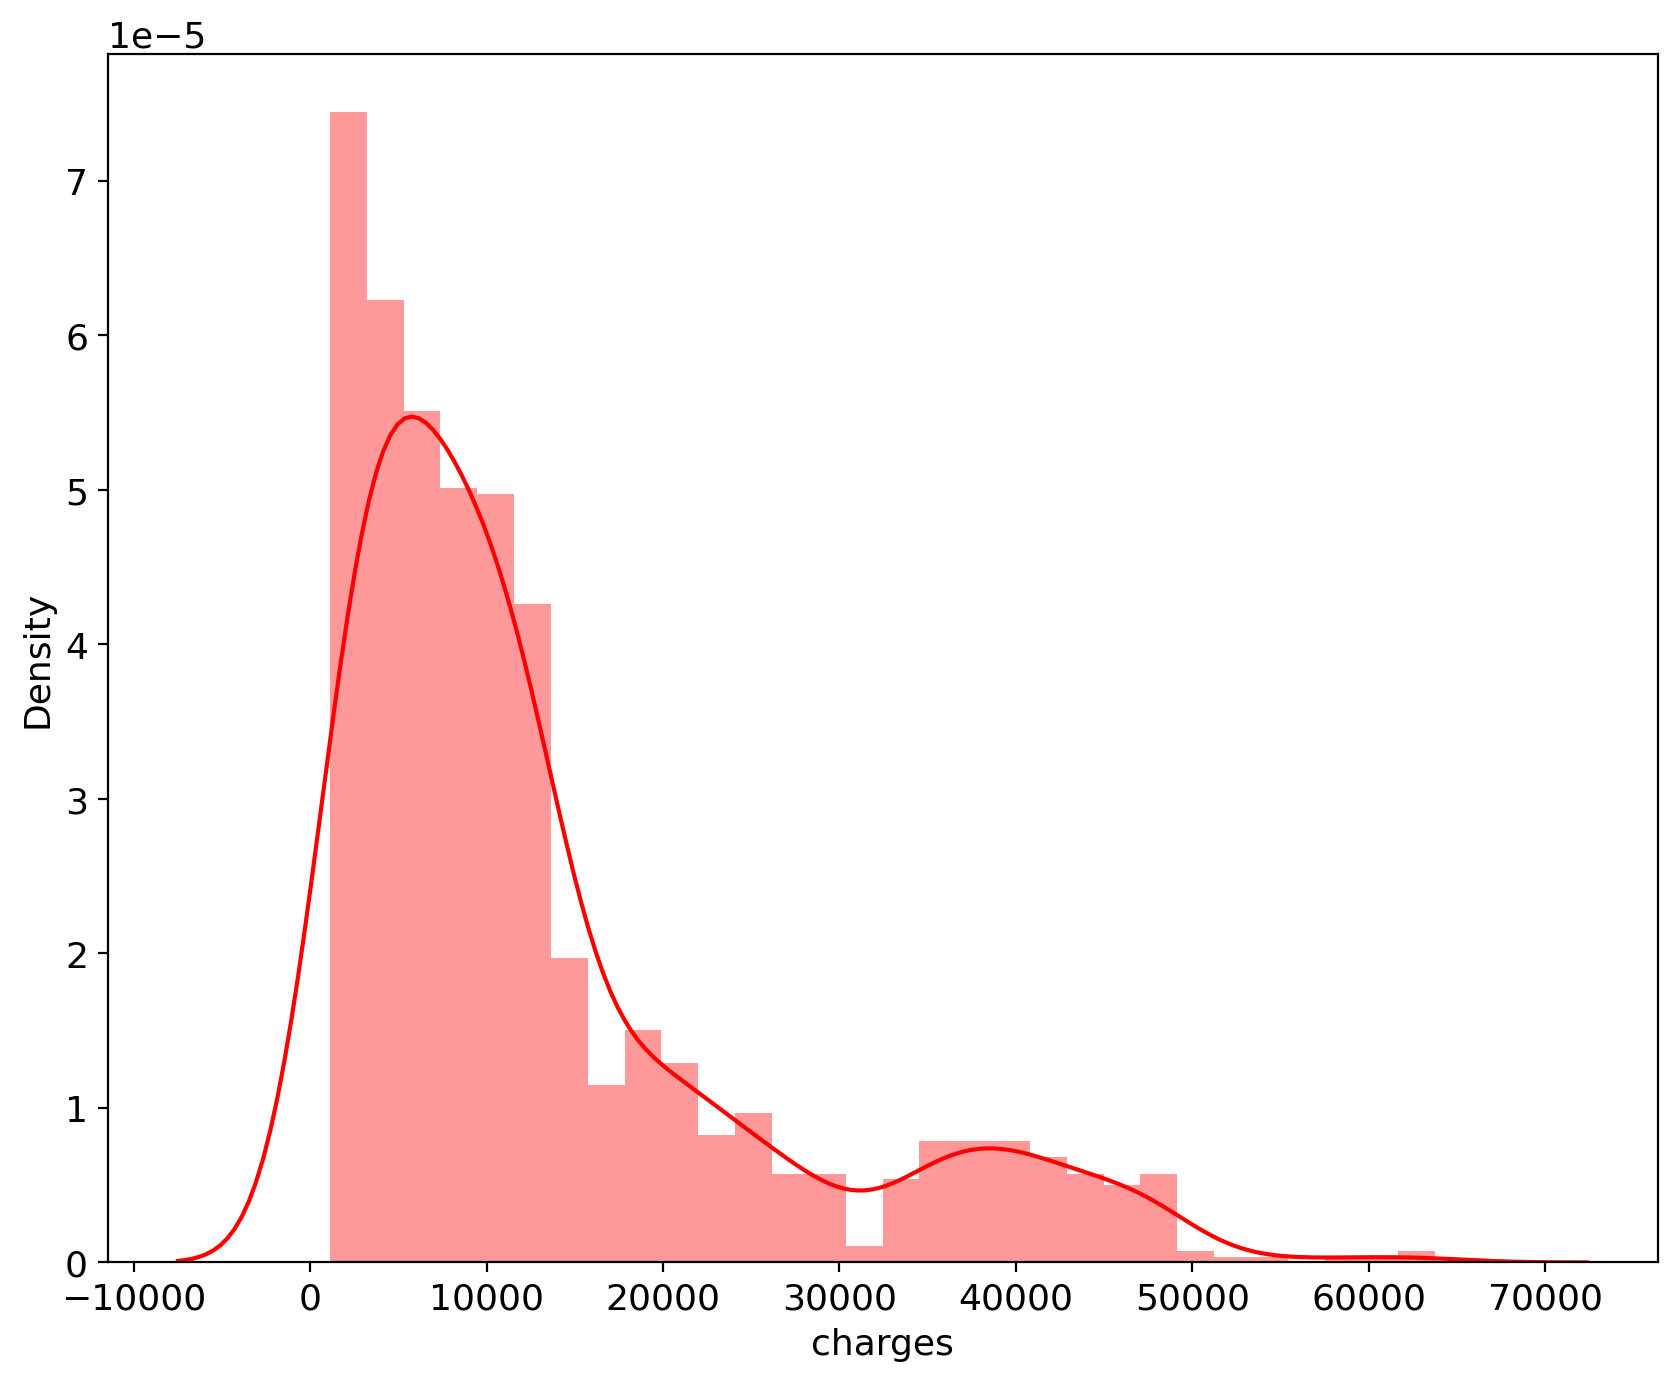

In [6]:
#Visualize the distribution of charges
ax = sns.distplot(df['charges'], kde = True, color = 'r')

<AxesSubplot:xlabel='charges', ylabel='Density'>

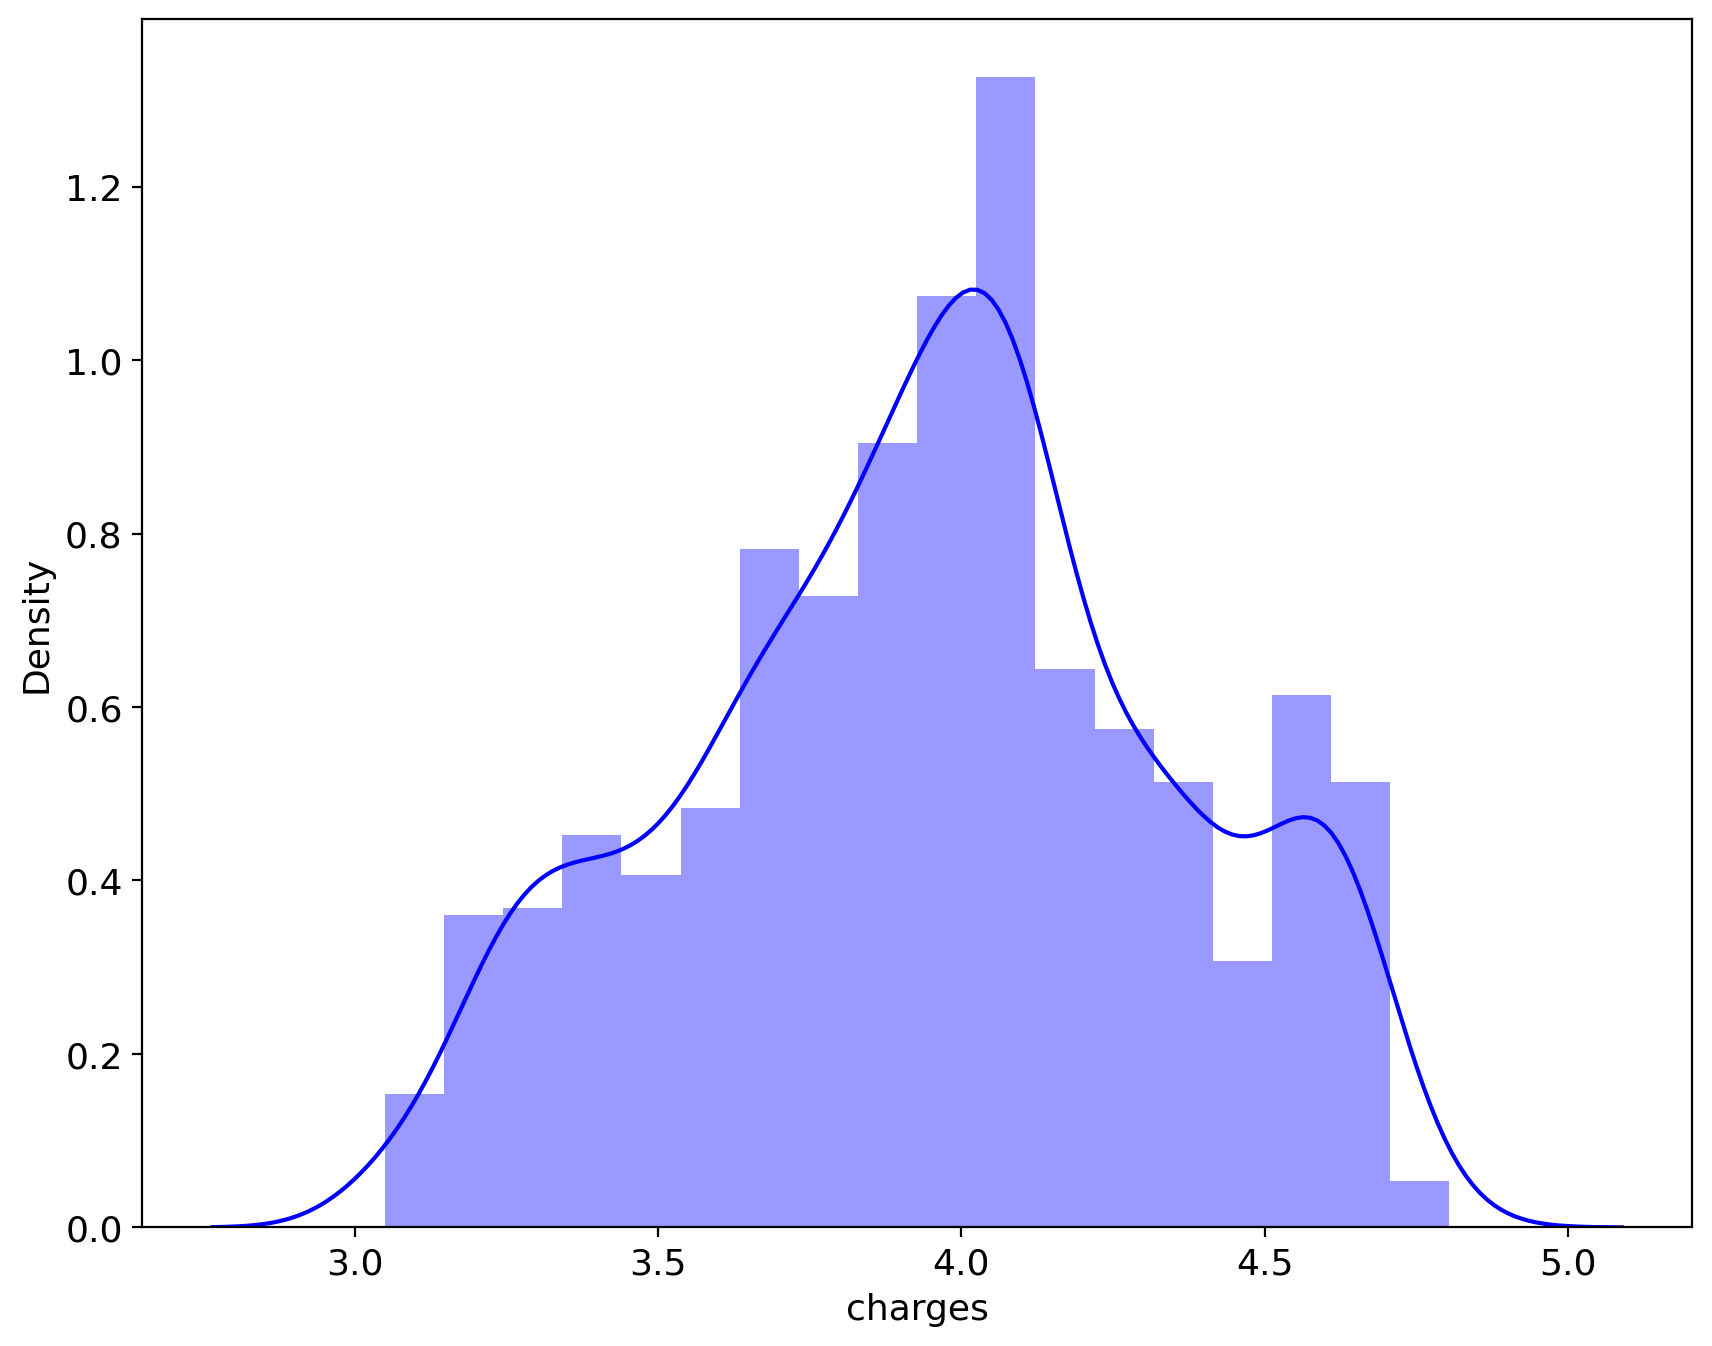

In [7]:
#apply natural log make the distribution to close normally
sns.distplot(np.log10(df['charges']), kde = True, color = 'b' )

<AxesSubplot:xlabel='charges', ylabel='region'>

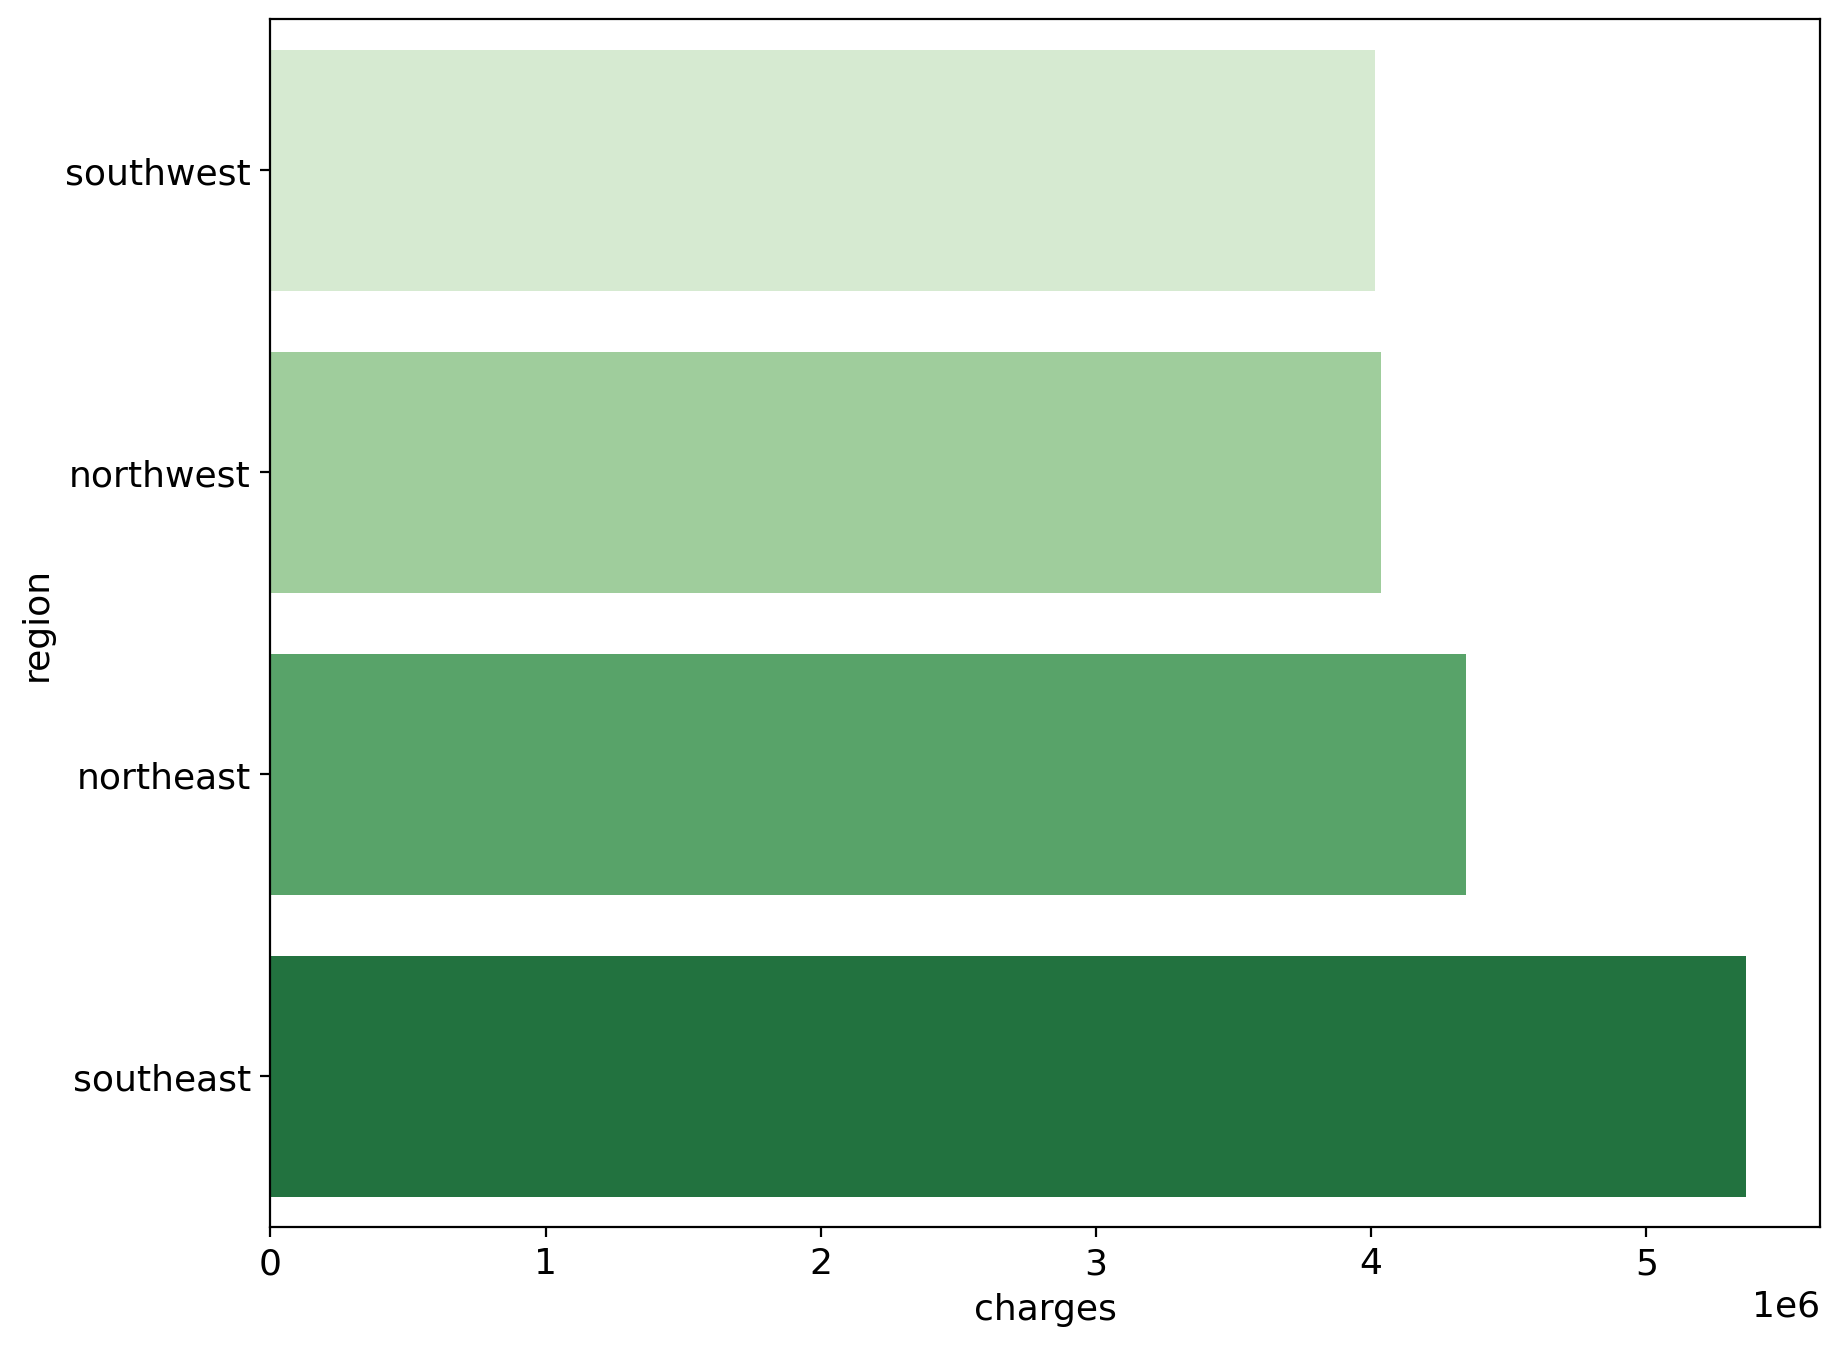

In [8]:
#Distribution of charges follow by the region
charges_region = df['charges'].groupby(df.region).sum().sort_values()
sns.barplot(charges_region.head(), charges_region.head().index, palette='Greens')

<AxesSubplot:xlabel='region', ylabel='charges'>

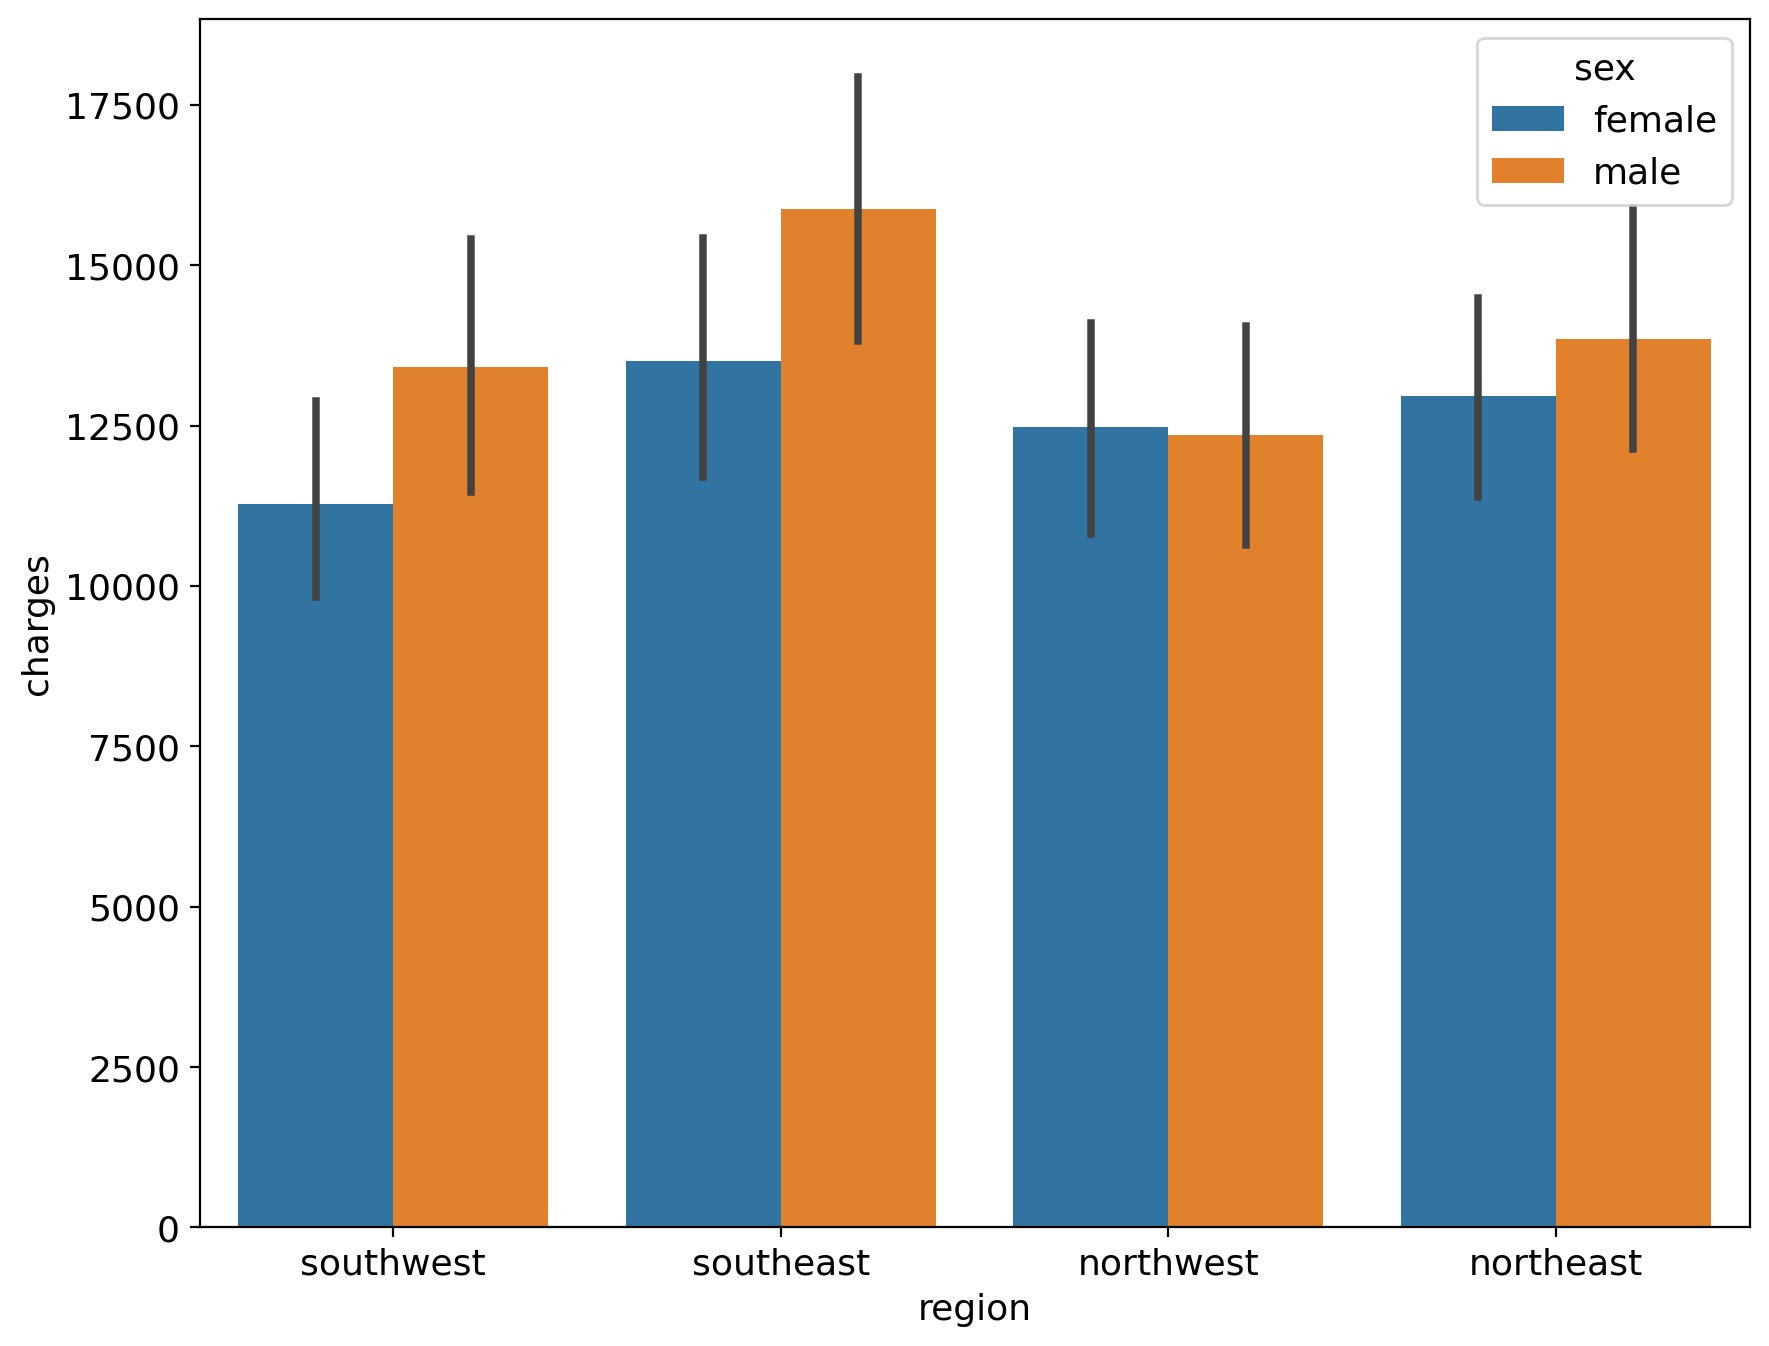

In [9]:
sns.barplot(x= 'region', y = 'charges', hue = 'sex', data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

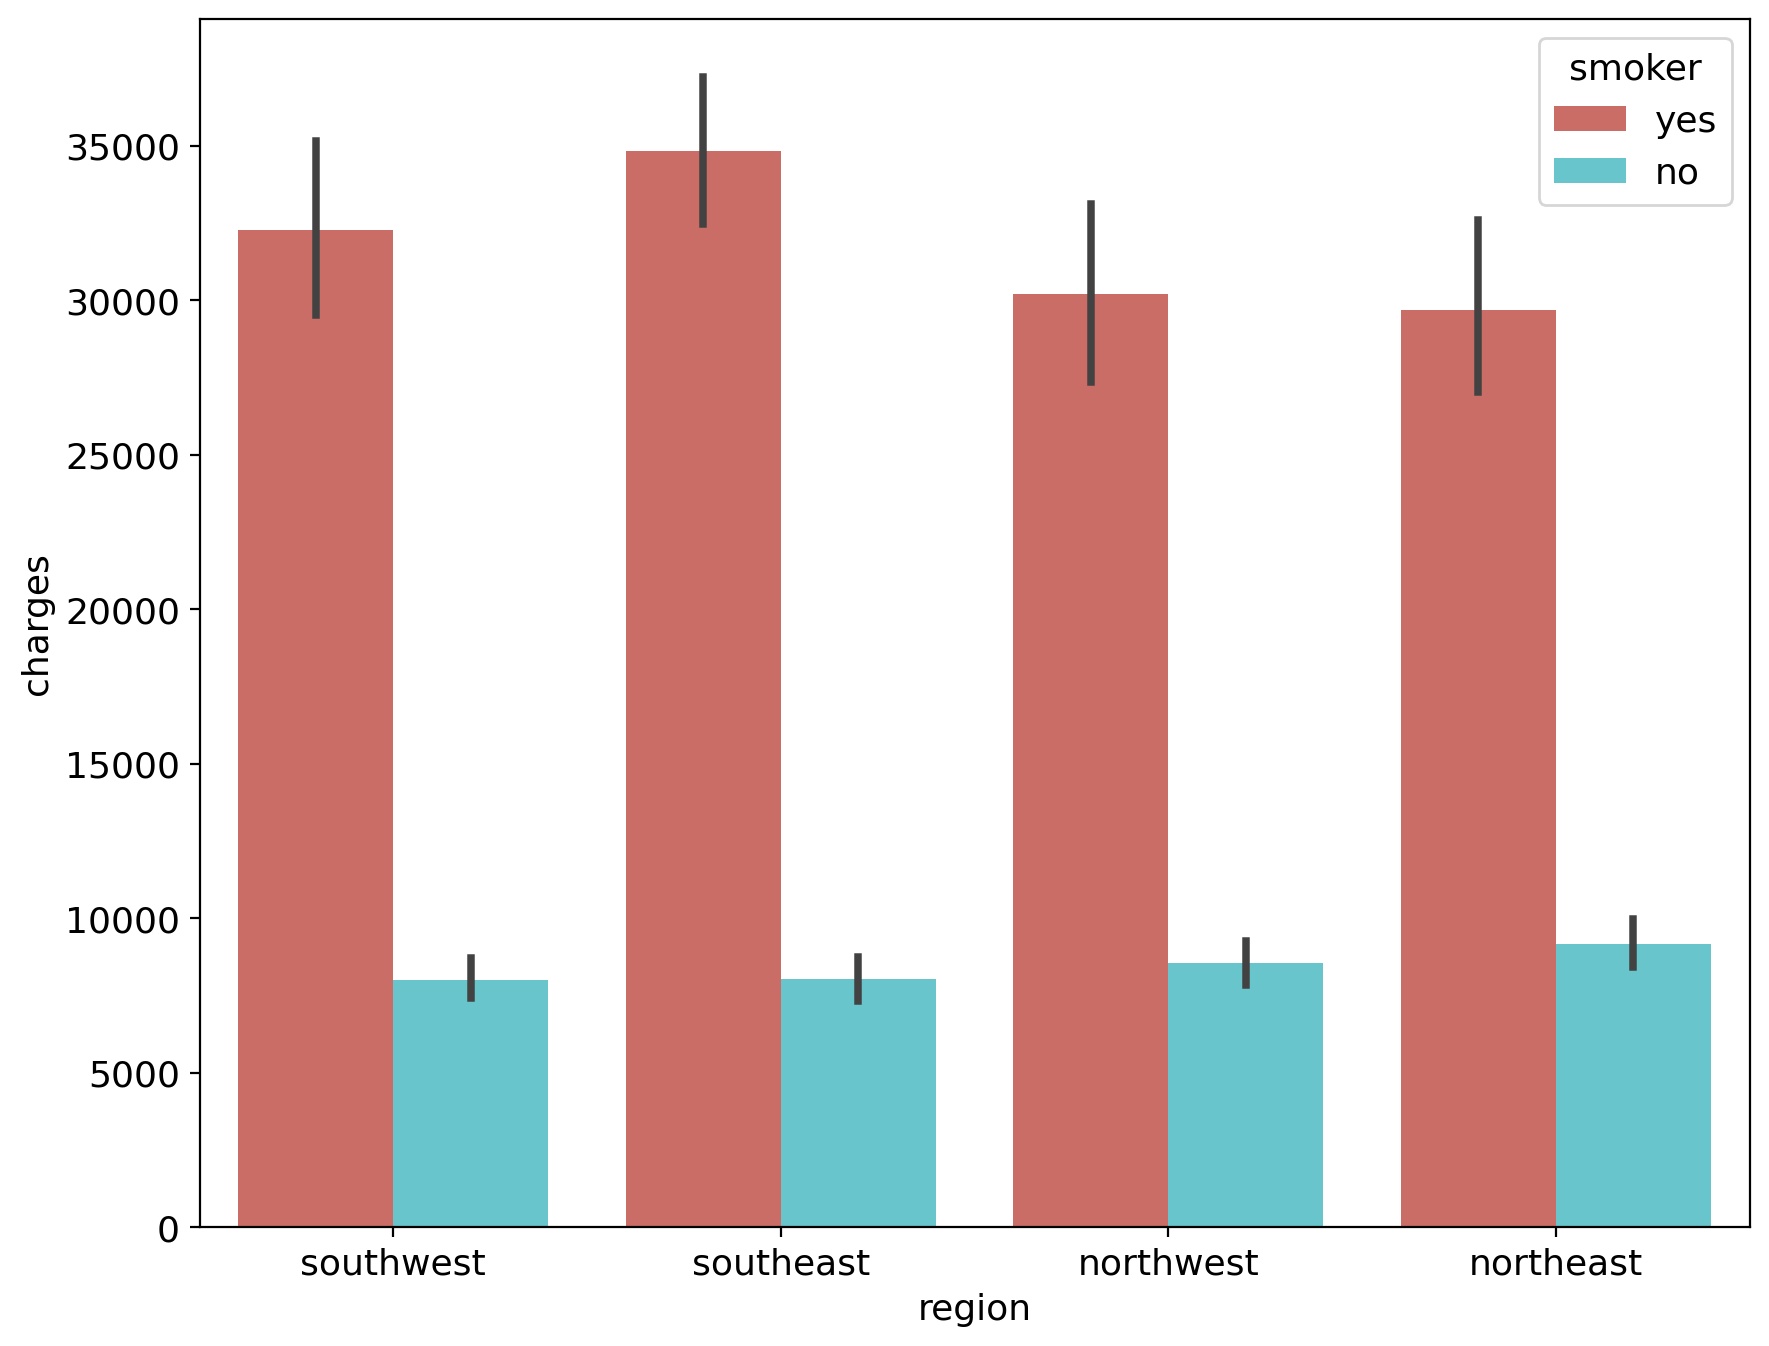

In [10]:
sns.barplot(x= 'region', y = 'charges',hue = 'smoker', data = df, palette='hls')

<AxesSubplot:xlabel='region', ylabel='charges'>

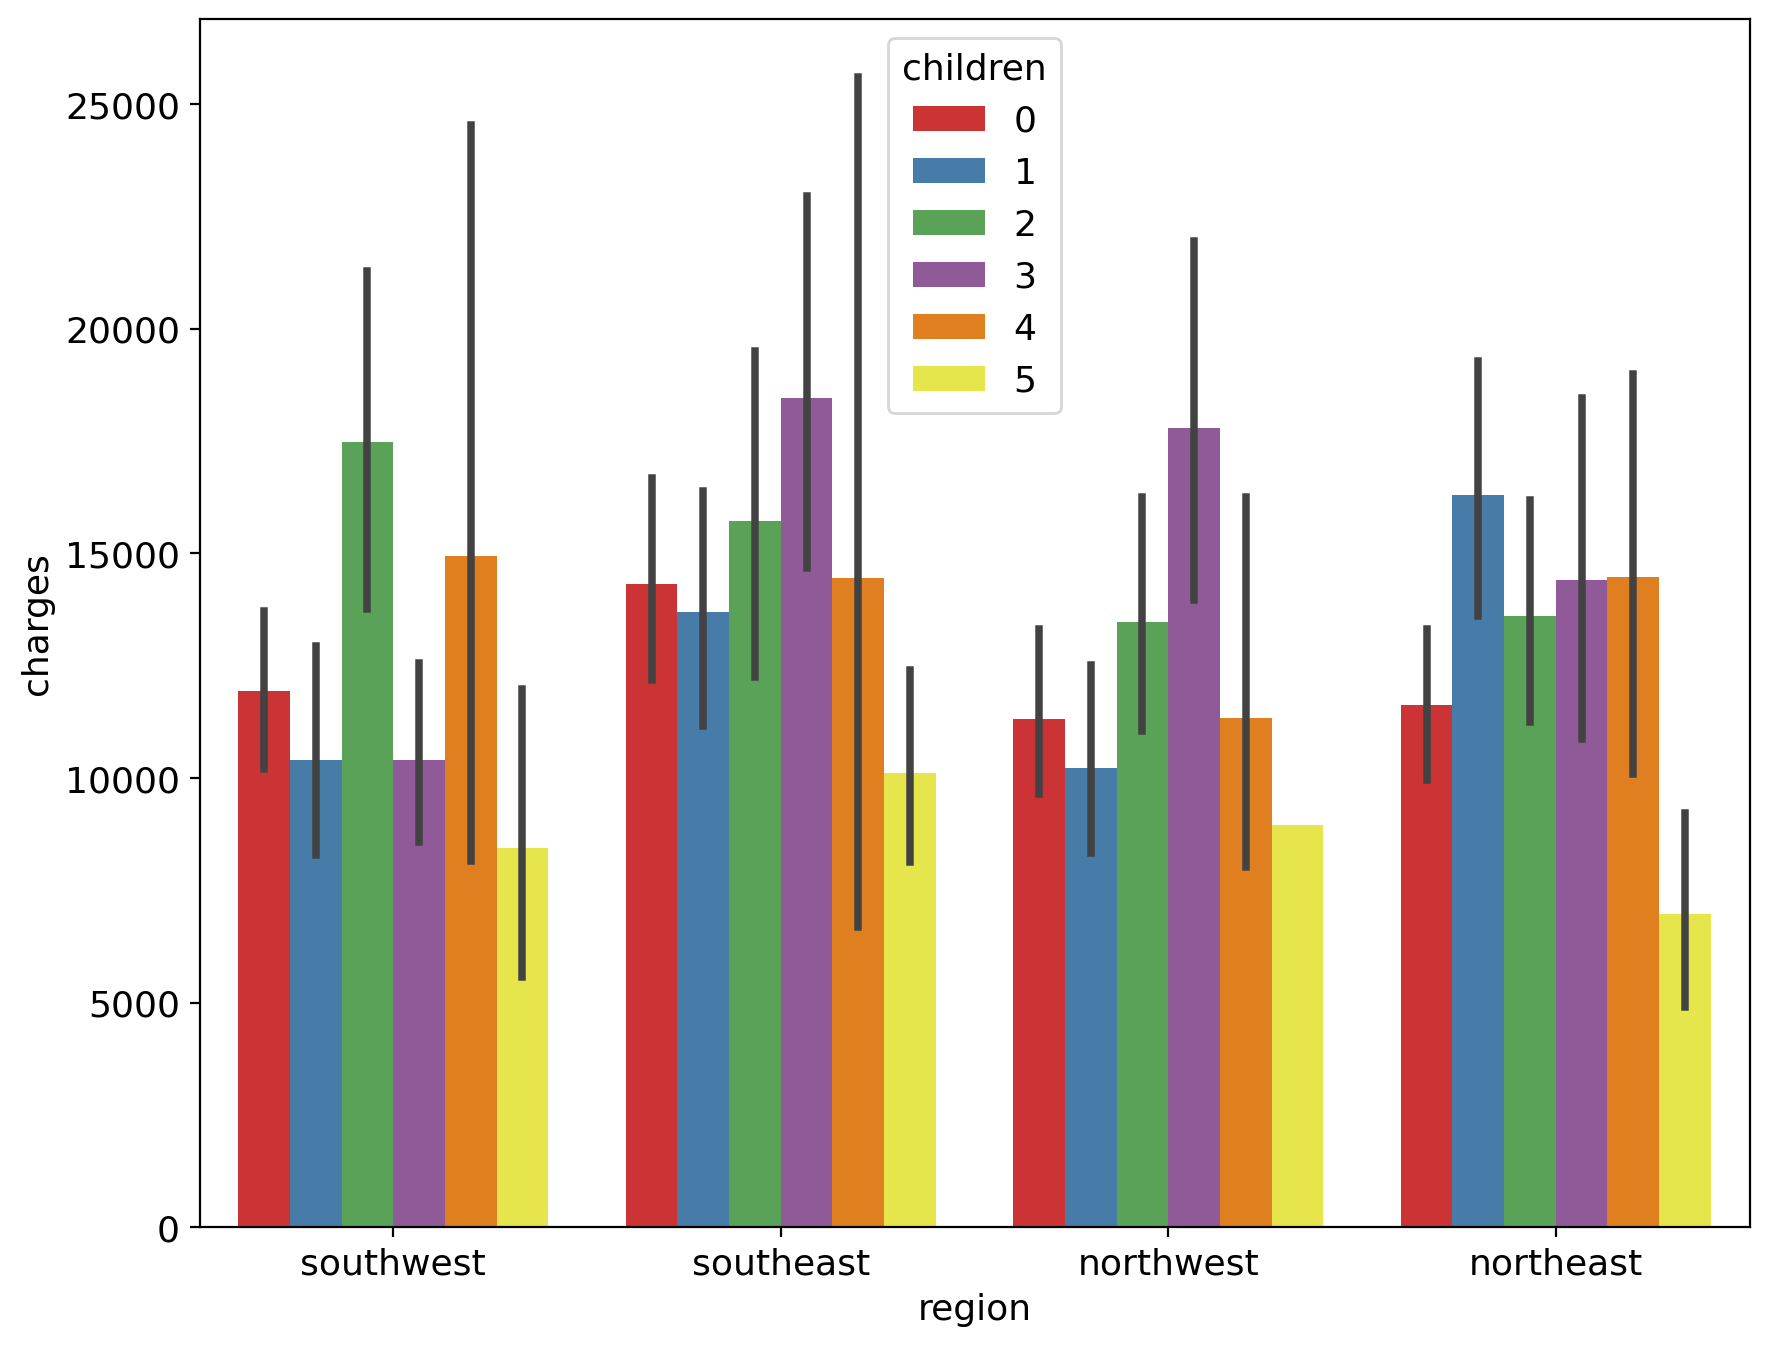

In [11]:
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

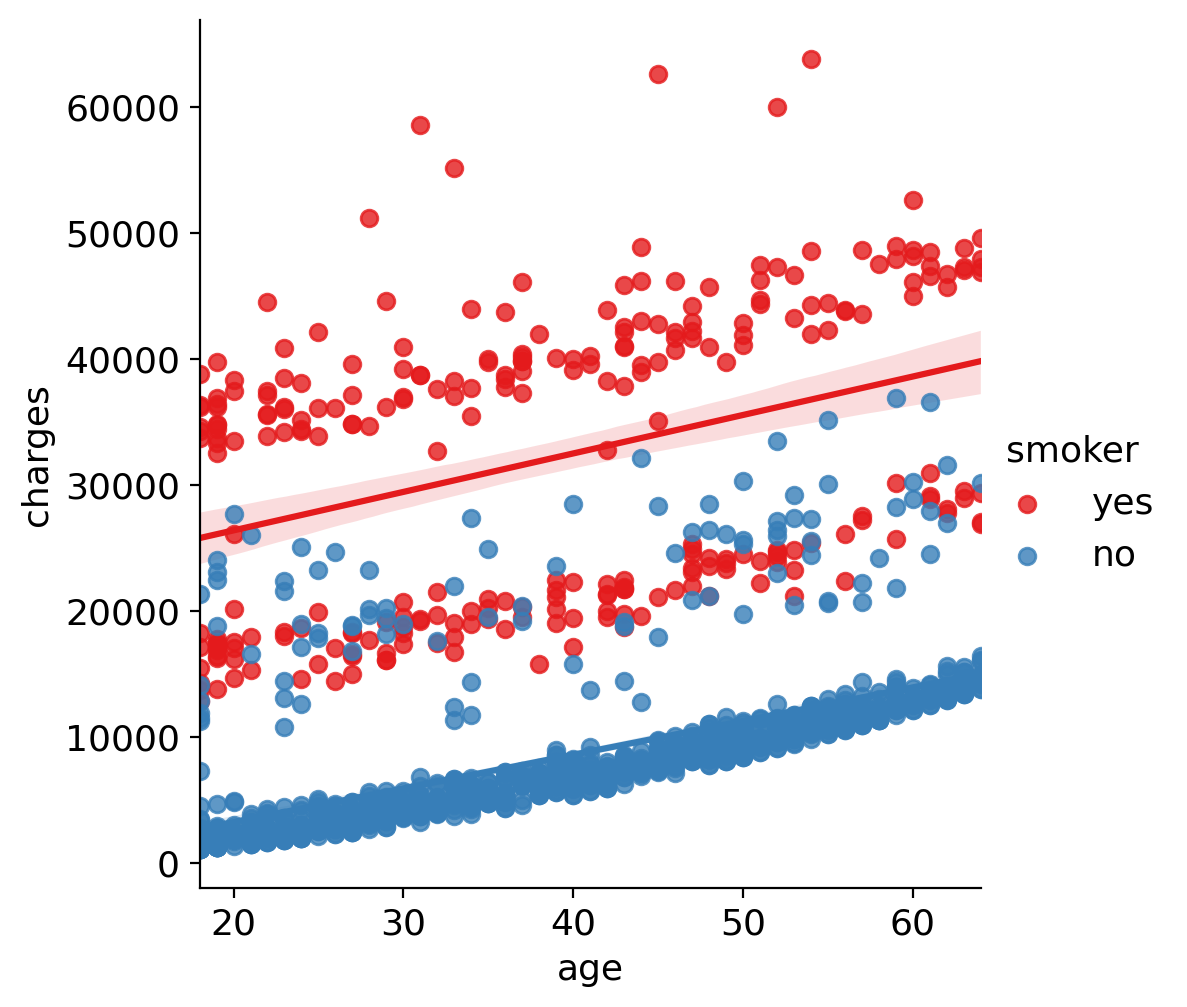

In [12]:
#Analyze the medcial charges by factors
sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')

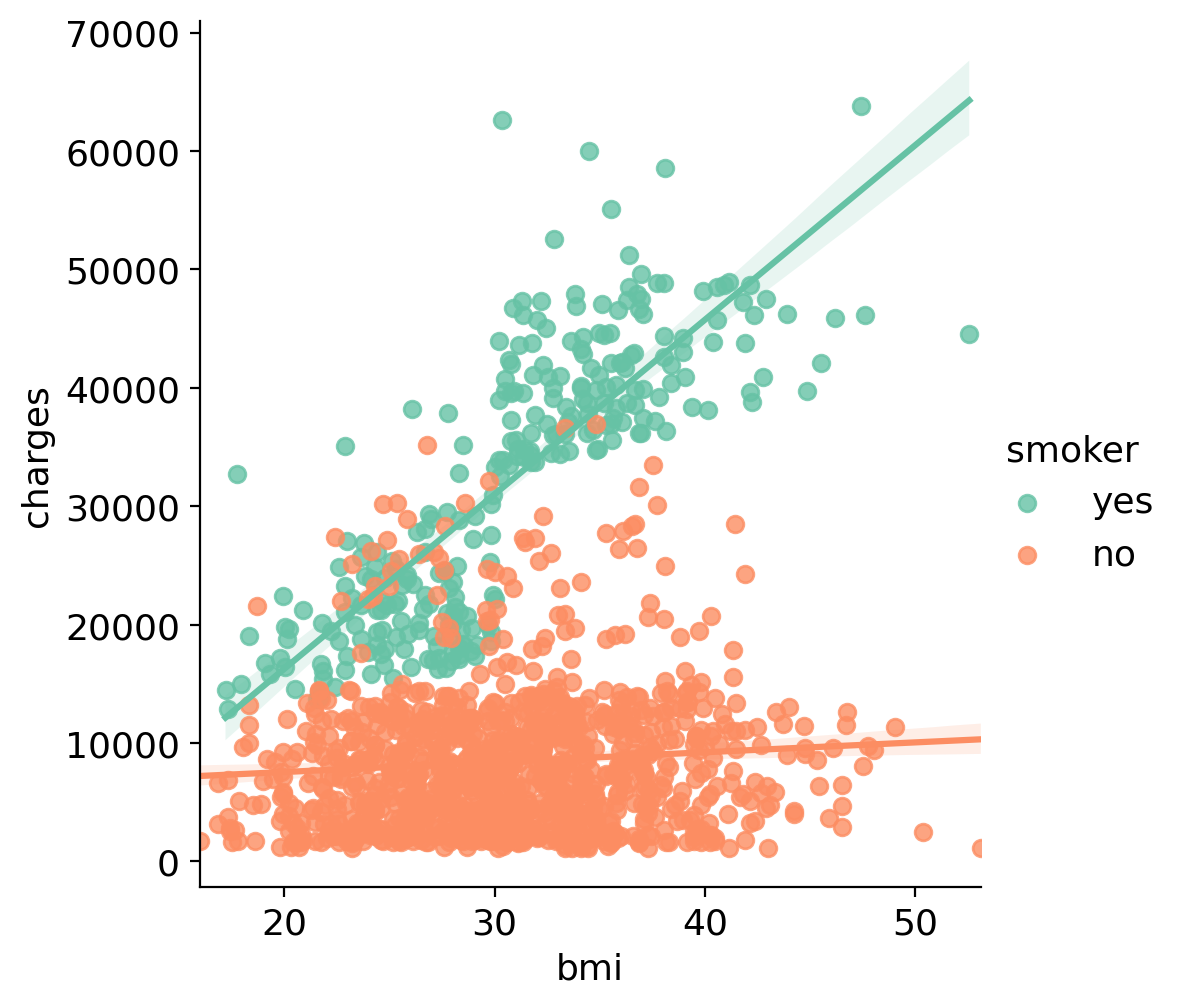

In [13]:
sns.lmplot(x= 'bmi', y = 'charges', data = df, hue= 'smoker', palette='Set2')

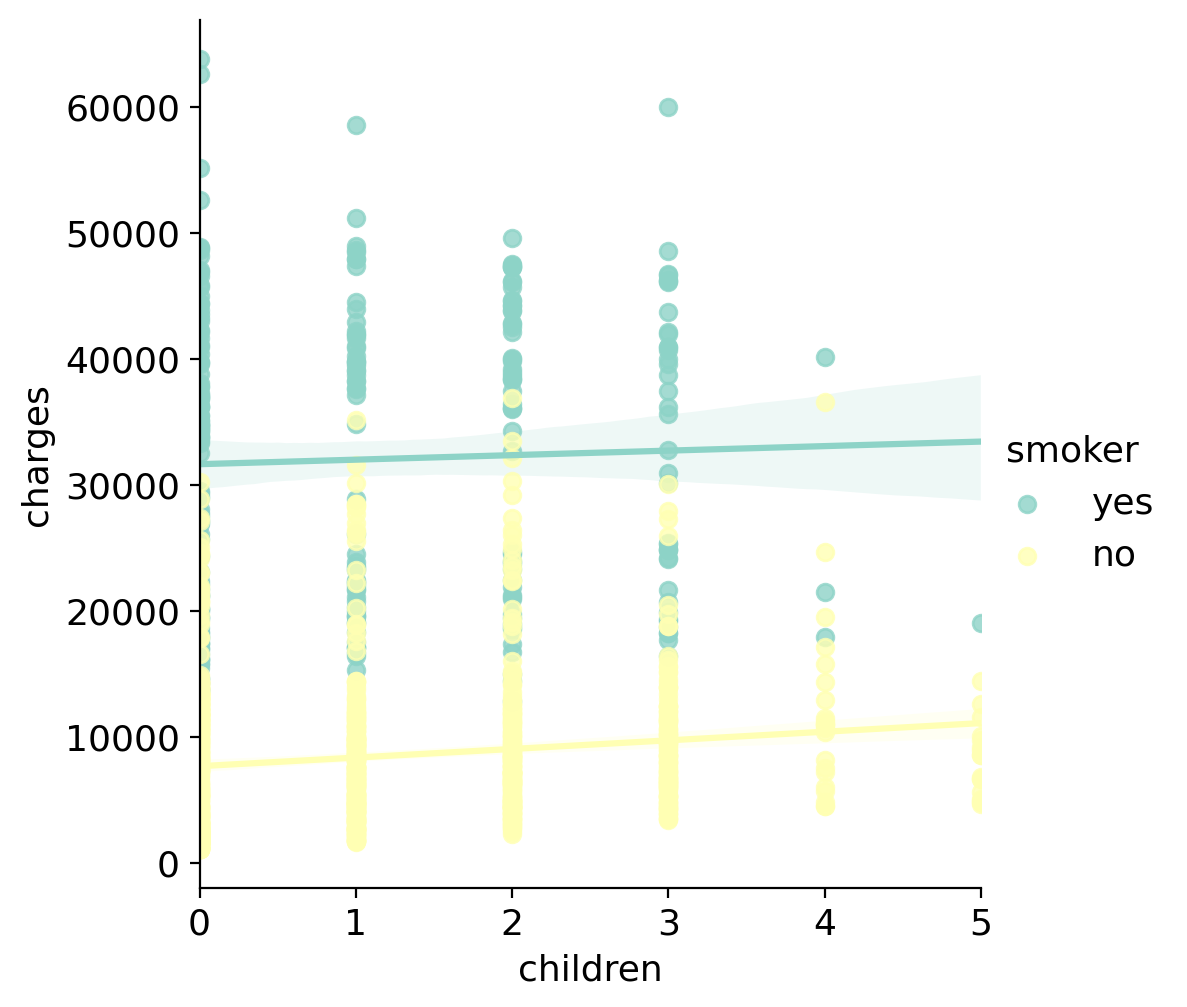

In [14]:
sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')


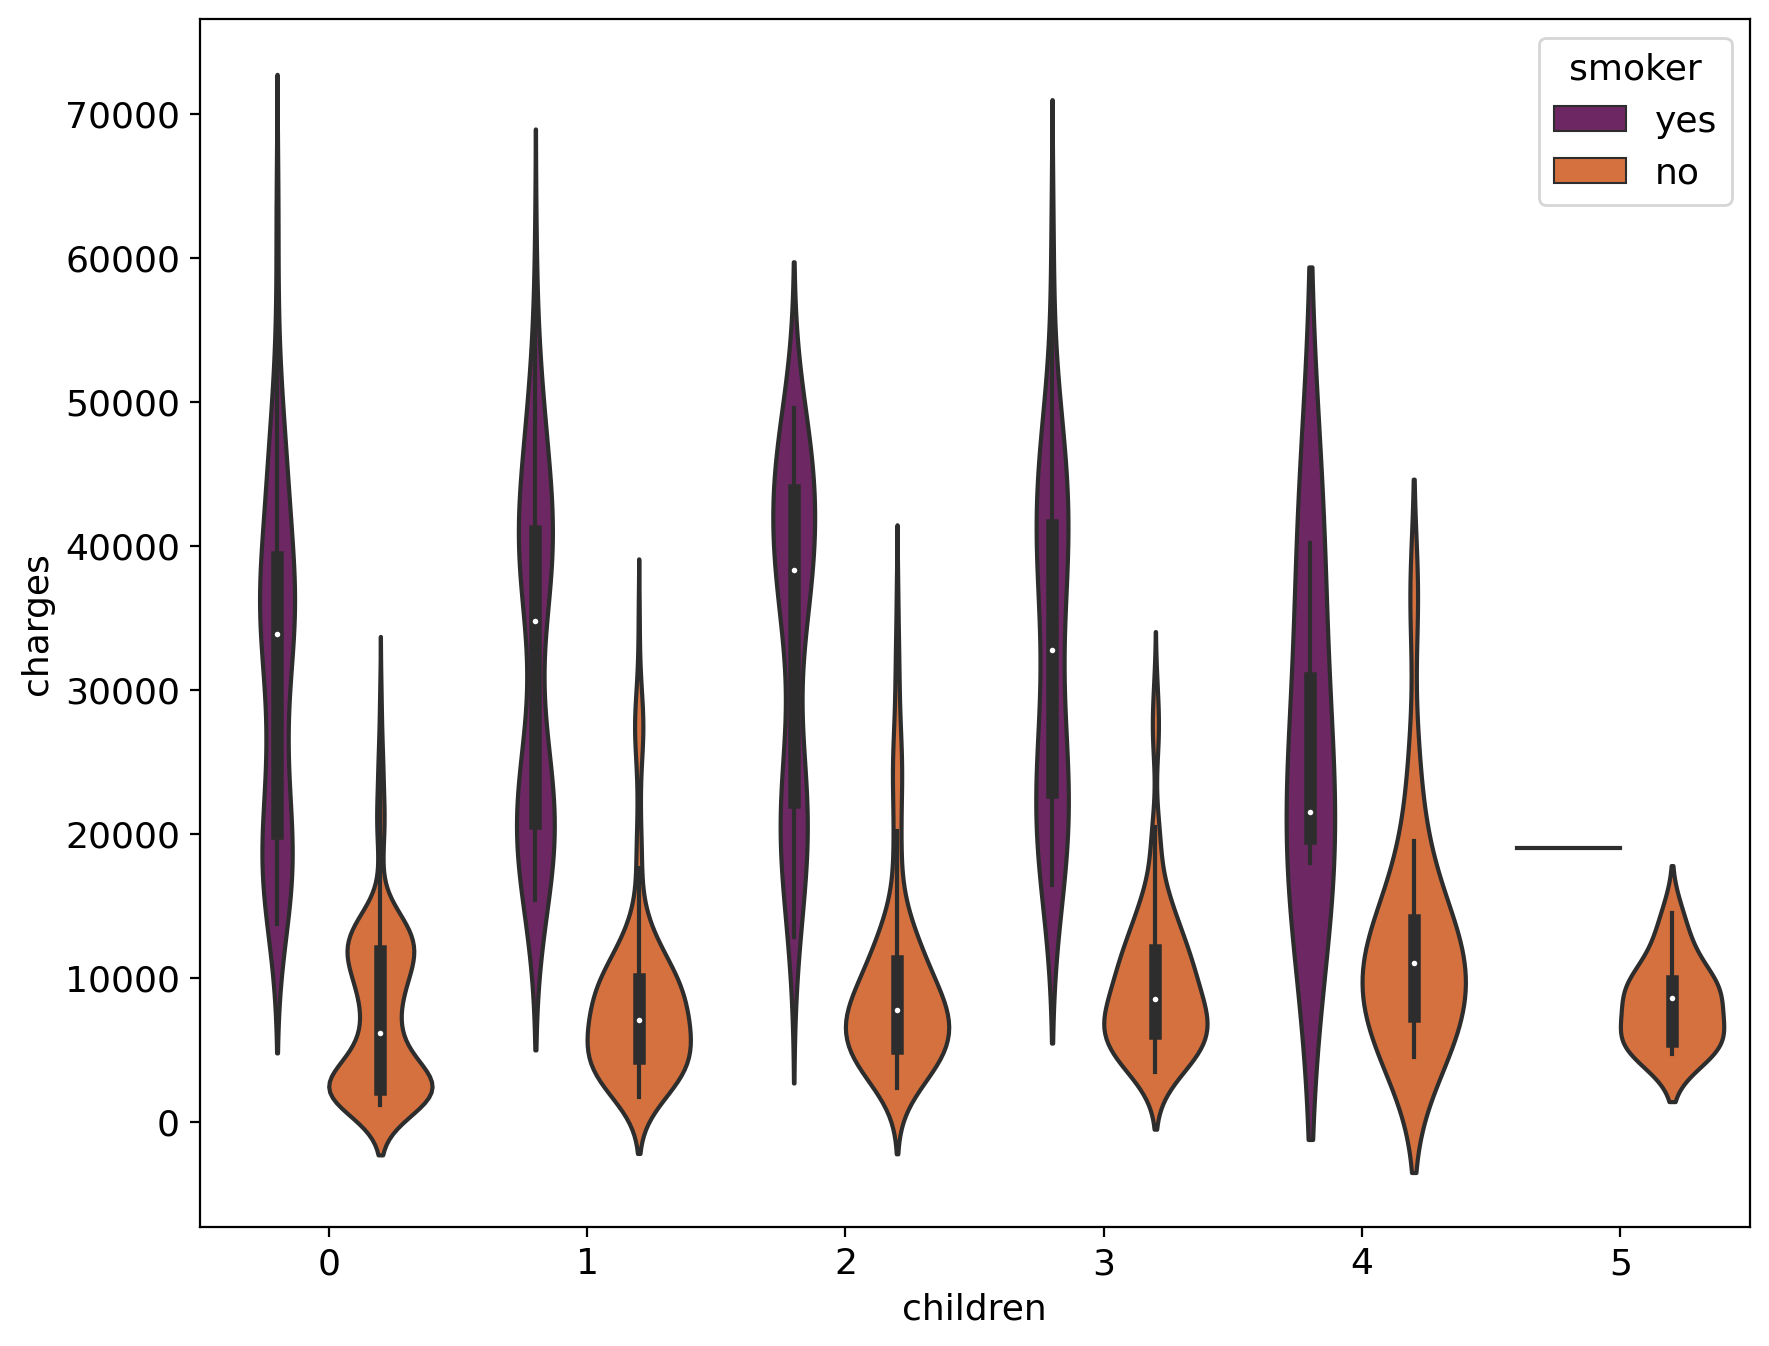

In [15]:
ax = sns.violinplot(x = 'children', y = 'charges', data=df, orient='v', hue='smoker', palette='inferno')

In [16]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [18]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:>

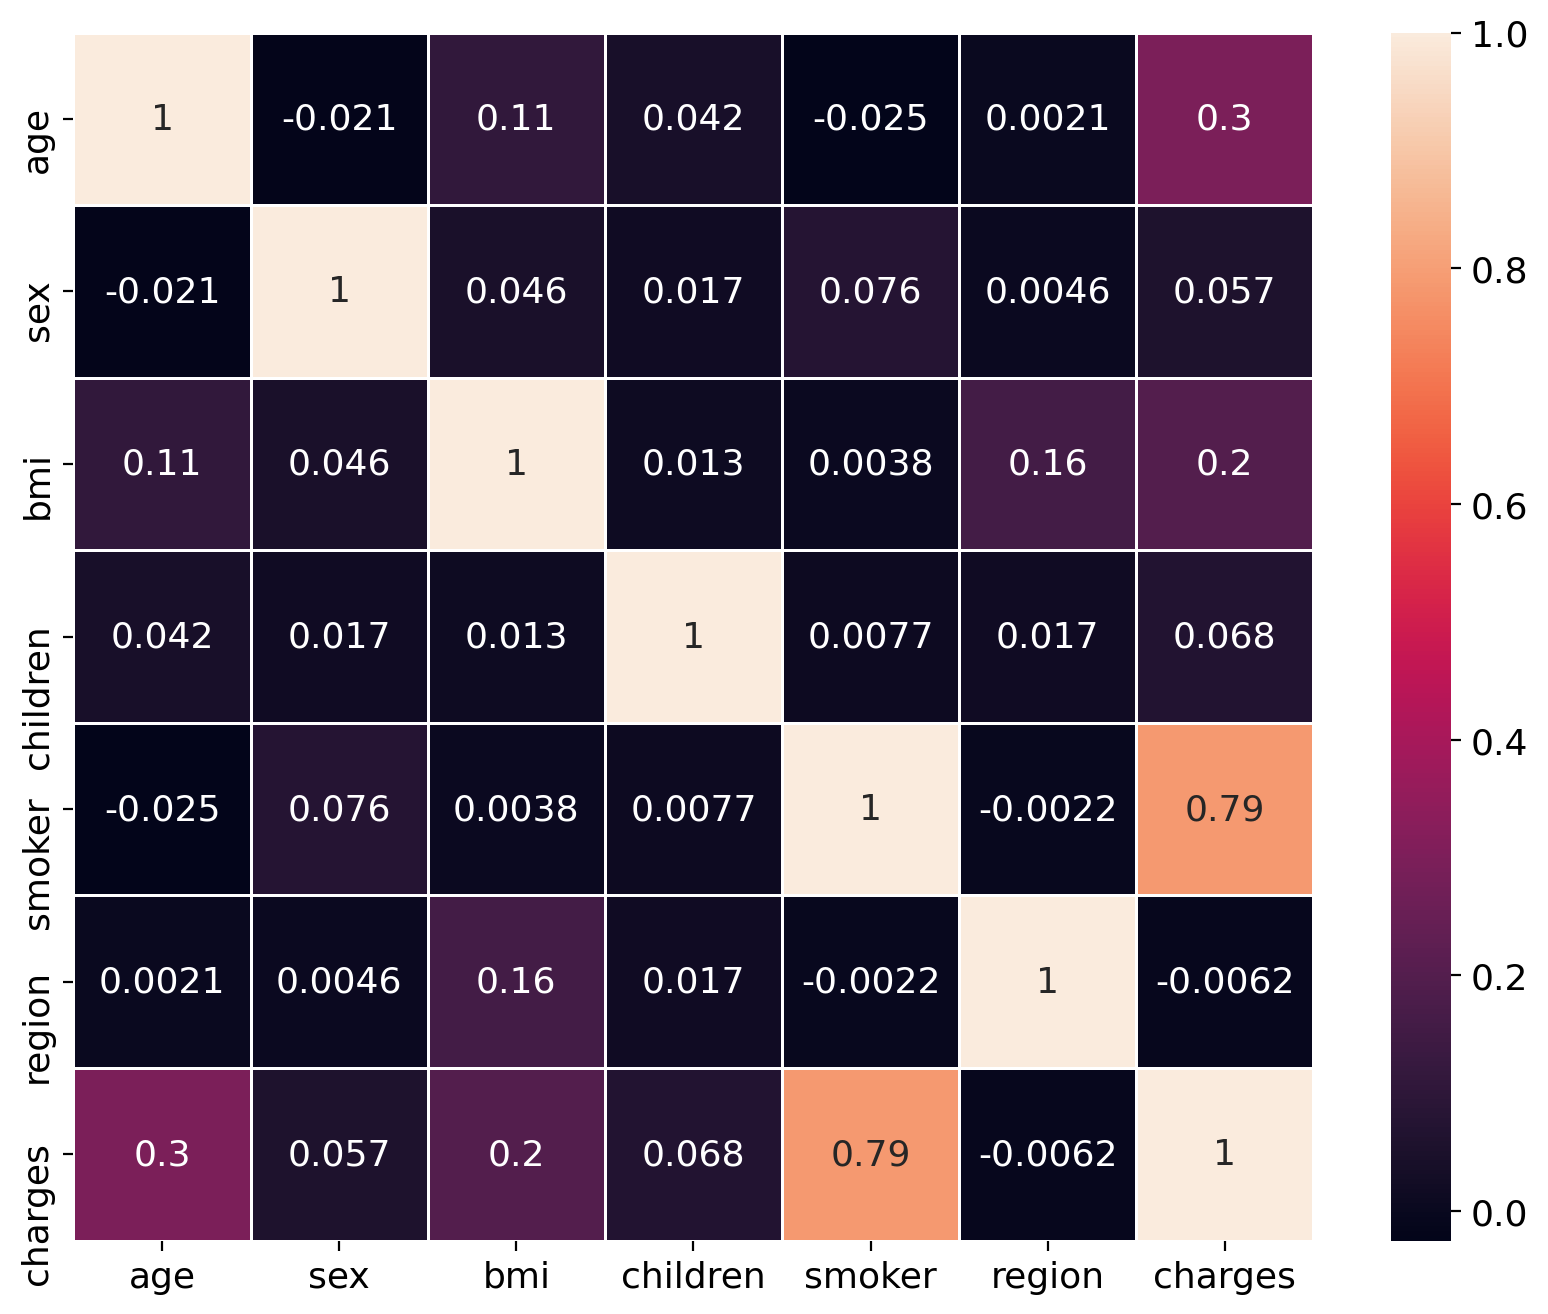

In [19]:
sns.heatmap(df.corr(), annot=True, linewidths=.5)


In [66]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(x_train, y_train)
print(model.score(x,y))
print(model.intercept_)
print(model.coef_)

0.7505773081116578
-11661.983908824392
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [82]:
predictions = model.predict(x_test)

Text(0, 0.5, 'Predicted Y')

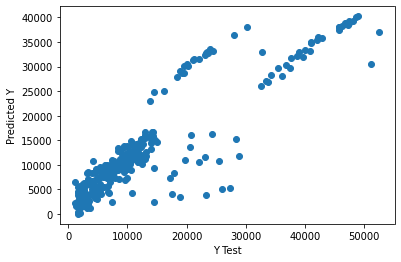

In [83]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [85]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   3930.3332739011385
MSE :   31845929.134159423
RMAE :   5643.2197488809015


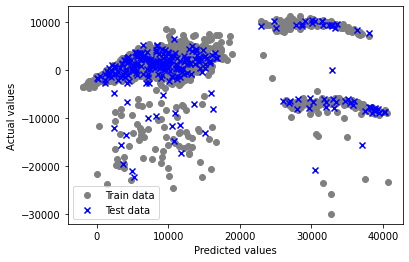

In [81]:
plt.scatter(x_train_pred, x_train_pred - y_train,c = 'gray', marker = 'o',label = 'Train data')
# plt.plot(x_train_pred, x_train_pred - y_train, color = '#FF0000', marker = "x", label = 'Actual')
# plt.plot(x_test_pred, x_test_pred - y_test, color = '#0000FF', marker = 'o', label = 'Predict')

plt.scatter(x_test_pred, x_test_pred - y_test,c = 'blue', marker = 'x',label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend()
